In [137]:
import pandas as pd, numpy as np, seaborn as sns
from datetime import datetime

In [138]:
char_stress = pd.read_csv('./char_stress0.csv')
roll_stress = pd.read_csv('./roll_stress0.csv')
data = pd.concat([
    char_stress,roll_stress
])

In [139]:
stats = pd.read_csv('./pod_metrics.csv')

In [140]:
stats

,dep_name,timestamp,cr_timestamp,time_window,container_name,cpu_use,mem_use
0,cassdb01-cassandra-0,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.261s,cassandra,129901272n,1988916Ki
1,cassdb01-cassandra-1,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.262s,cassandra,254929008n,1741056Ki
2,cassdb01-cassandra-2,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.262s,cassandra,250006809n,1764656Ki
3,rabbitmq-5b7c5c8594-plk7b,2024-12-10T00:36:34Z,2024-12-10T00:36:49Z,12.26s,rabbitmq,5605595n,155920Ki
4,workerdb-665c87bb99-d25hj,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.261s,workerdb,56594n,25372Ki
...,...,...,...,...,...,...,...
2964,workerdb-665c87bb99-d25hj,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15.001s,workerdb,3826n,26680Ki
2965,workerdb-665c87bb99-ksfzw,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15s,workerdb,4066n,26680Ki
2966,workerdb-665c87bb99-pf9rw,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15.001s,workerdb,91887n,28524Ki
2967,workerdb-665c87bb99-wlfp7,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15s,workerdb,78673n,27404Ki


In [141]:
stats['cpu_unit'] = stats['cpu_use'].str[-1]
stats['cpu_use'] = stats['cpu_use'].str[:-1]
stats.loc[
    (stats['cpu_use'].isna()) |
    (~stats['cpu_use'].str.contains('[0-9]+')),'cpu_use'
] = '0'
stats['cpu_use'] = stats['cpu_use'].astype(int)
stats

,dep_name,timestamp,cr_timestamp,time_window,container_name,cpu_use,mem_use,cpu_unit
0,cassdb01-cassandra-0,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.261s,cassandra,129901272,1988916Ki,n
1,cassdb01-cassandra-1,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.262s,cassandra,254929008,1741056Ki,n
2,cassdb01-cassandra-2,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.262s,cassandra,250006809,1764656Ki,n
3,rabbitmq-5b7c5c8594-plk7b,2024-12-10T00:36:34Z,2024-12-10T00:36:49Z,12.26s,rabbitmq,5605595,155920Ki,n
4,workerdb-665c87bb99-d25hj,2024-12-10T00:36:35Z,2024-12-10T00:36:49Z,12.261s,workerdb,56594,25372Ki,n
...,...,...,...,...,...,...,...,...
2964,workerdb-665c87bb99-d25hj,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15.001s,workerdb,3826,26680Ki,n
2965,workerdb-665c87bb99-ksfzw,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15s,workerdb,4066,26680Ki,n
2966,workerdb-665c87bb99-pf9rw,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15.001s,workerdb,91887,28524Ki,n
2967,workerdb-665c87bb99-wlfp7,2024-12-10T00:47:44Z,2024-12-10T00:47:45Z,15s,workerdb,78673,27404Ki,n


In [142]:
stats['mem_unit'] = stats['mem_use'].str[-2:]
stats['mem_use'] = stats['mem_use'].str[:-2].astype(int)
stats['mem_unit'].unique()

array(['Ki', 'Mi'], dtype=object)

In [143]:
t = stats.groupby(by=['container_name','timestamp']).agg({
    'cpu_use':np.mean,
    'mem_use':np.mean
}).reset_index()

In [144]:
t

,container_name,timestamp,cpu_use,mem_use
0,cassandra,2024-12-10T00:36:35Z,2.116124e+08,1.831543e+06
1,cassandra,2024-12-10T00:36:50Z,2.448269e+08,1.831803e+06
2,cassandra,2024-12-10T00:37:02Z,2.659418e+08,1.831848e+06
3,cassandra,2024-12-10T00:37:17Z,2.931708e+08,1.831899e+06
4,cassandra,2024-12-10T00:37:29Z,2.727506e+08,1.831917e+06
...,...,...,...,...
293,workerroll,2024-12-10T00:46:49Z,0.000000e+00,2.060400e+04
294,workerroll,2024-12-10T00:47:02Z,6.294300e+04,2.060400e+04
295,workerroll,2024-12-10T00:47:17Z,0.000000e+00,2.060400e+04
296,workerroll,2024-12-10T00:47:29Z,8.867200e+04,2.060400e+04


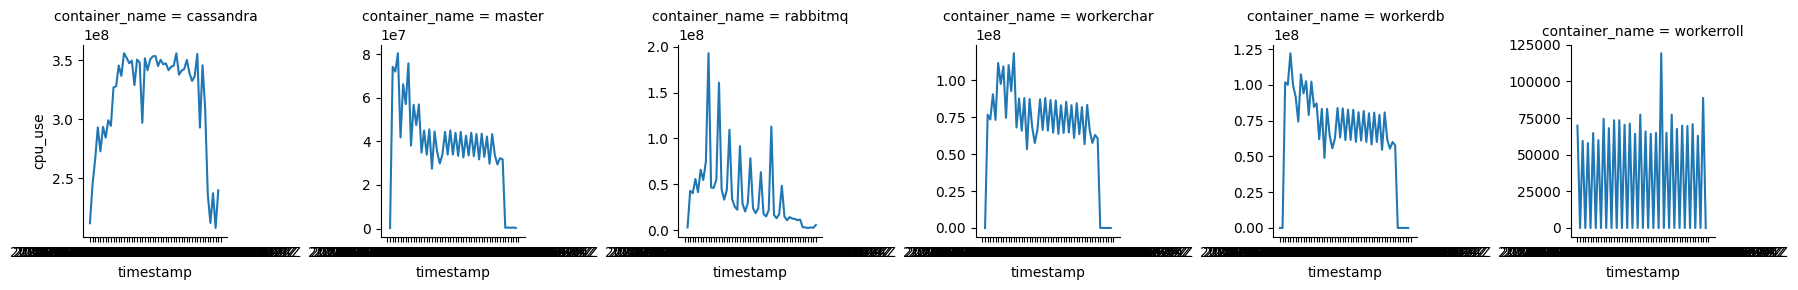

In [145]:
g = sns.FacetGrid(data=t,col='container_name',sharey=False)
g.map_dataframe(sns.lineplot,x='timestamp',y='cpu_use')

# sns.barplot(data=stats,x='timestamp',y='cpu_use',hue='container_name')

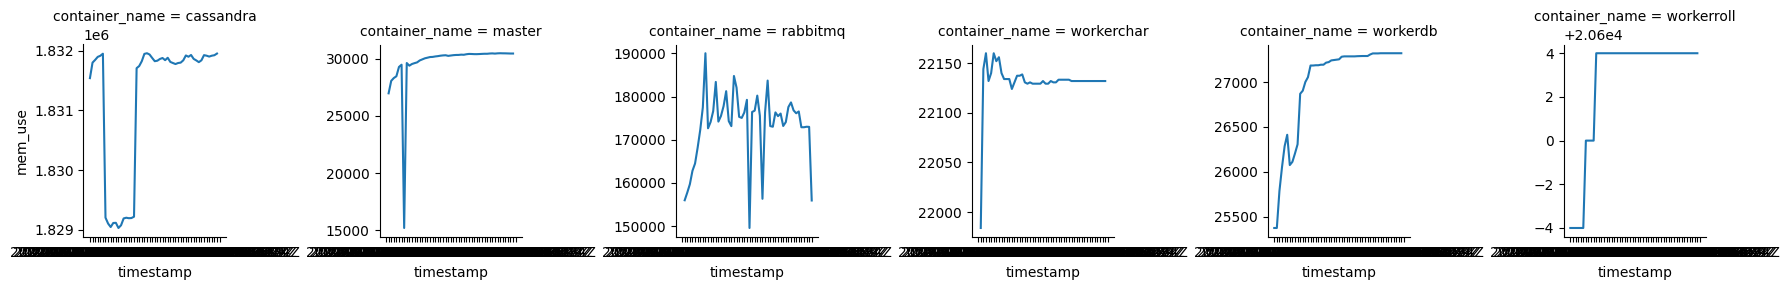

In [146]:
g = sns.FacetGrid(data=t,col='container_name',sharey=False)
g.map_dataframe(sns.lineplot,x='timestamp',y='mem_use')